In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
a=tf.constant(1)
b=tf.constant(2)

In [3]:
data=np.load('data_with_labels.npz')
train=data['arr_0']/255
labels=data['arr_1']

In [4]:
"""we find the font the particular 
character 
belongs, one nrep
 white ,255 rep 
 black everything else 
 #rest are shade of grey """


'we find the font the particular \ncharacter \nbelongs, one nrep\n white ,255 rep \n black everything else \n #rest are shade of grey '

In [5]:
outlabels=np.zeros((len(labels)))


In [6]:
def to_onehot(labels,nclasses=5):

    """ Convert the labels to onehot 
         encoding mode there are 4 labels which represent
        the 4 different types of fonts"""
    
    outlabels=np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l]=1
    return outlabels
   







In [6]:
onehot=to_onehot(labels)

In [8]:
indices=np.random.permutation(train.shape[0])

In [9]:
valid_cnt=int(train.shape[0]*0.1)
test_idx,training_idx=indices[:valid_cnt],indices[valid_cnt:]
test,train=train[test_idx,:],train[training_idx,:]

In [10]:
onehot_test,onehot_train=onehot[test_idx,:],onehot[training_idx,:]

In [11]:
sess=tf.InteractiveSession()

In [12]:
x=tf.placeholder("float",[None,1296])
y_=tf.placeholder("float",[None,5])
W=tf.Variable(tf.zeros([1296,5]))
b=tf.Variable(tf.zeros([5]))

In [13]:
sess.run(tf.global_variables_initializer())

In [14]:
y=tf.nn.softmax(tf.matmul(x,W)+b)

In [15]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y+1e-50,y_))

In [16]:
train_step=tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)

In [26]:
correct_prediction = tf.equal(tf.argmax(y,1),
                     tf.argmax(y_,1))

print(train.reshape([-1,1296]).shape)
print(len(onehot_train))

(2511, 1296)
2511


In [24]:
accuracy=tf.reduce_mean(tf.cast(correct_prediction
                                ,"float"))
A=accuracy.eval(feed_dict={x:train.reshape([-1,1296]),
        y_:onehot_train})
A

0.20230983

In [26]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

In [27]:
epochs=1000
train_acc=np.zeros(epochs//10)
test_acc=np.zeros(epochs//10)
for i in tqdm(range(epochs)):
    if i%10==0:
        A=accuracy.eval(feed_dict={x:train.reshape([-1,1296]),
        y_:onehot_train})
        train_acc[i/10]=A
        # and now the validation set
        A=accuracy.eval(feed_dict={x:test.reshape([-1,1296]),
        y_:onehot_test})
        test_acc[i/10]=A
        train_step.run(feed_dict={x:train.reshape([-1,1296]),y_:onehot_train})
        
        

In [28]:
print(train_acc[-1])

0.203106328845


In [29]:
print test_acc[-1]

0.172043010592


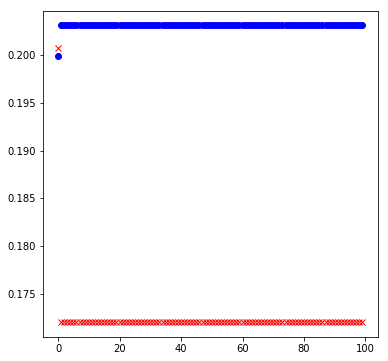

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


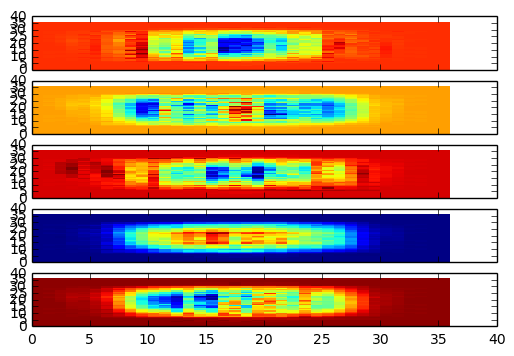